# Boosting

To illustrate this concept we will once again consider the penguin dataset; and compare the performance between a **bagging classifier** of many depth 2 decision trees and **boosting classifier**. Run the following code cell to load the penguin dataset and visualize the data.

# AdaBoost

With AdaBoost, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a relative weight. The next classifier is then trained on the dataset using these relative weights, and so on.

The idea is that whenever a classifier missclassifies a data point,this data point is then boosted to signal difficulty in classification.

## 1. Data preprocessing

We first prerpocess the data to drop NAN, in case X matrix and y contain NAN

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Then we visulize the data before making the classification

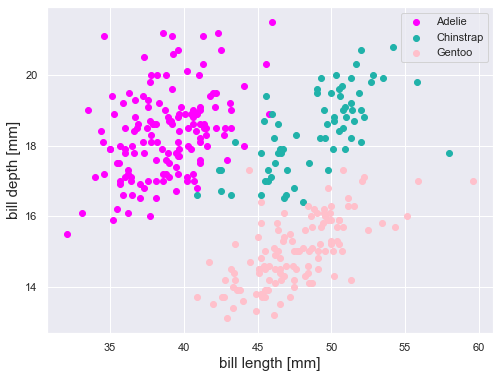

In [4]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap","Gentoo"]
colors = ["magenta", "lightseagreen","pink"]

fig, ax = plt.subplots(figsize = (8, 6))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

From the plot above, we can see that there is a clear distinction between these three categories.

We first split the dataset into train data and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 3)

## 2. Train AdaBoost Model

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier( max_depth =2, random_state = 3),
                            n_estimators = 500,
                            algorithm = "SAMME.R",
                            learning_rate = 0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=3),
                   learning_rate=0.5, n_estimators=500)

Using classifier to make the predictions

In [47]:
ada_y_pred = ada_clf.predict(X_test)

As you will notice by running the following code cell, the decision regions generated by AdaBoost are distinctly different from those generated by the bagging and random forest algorithms.

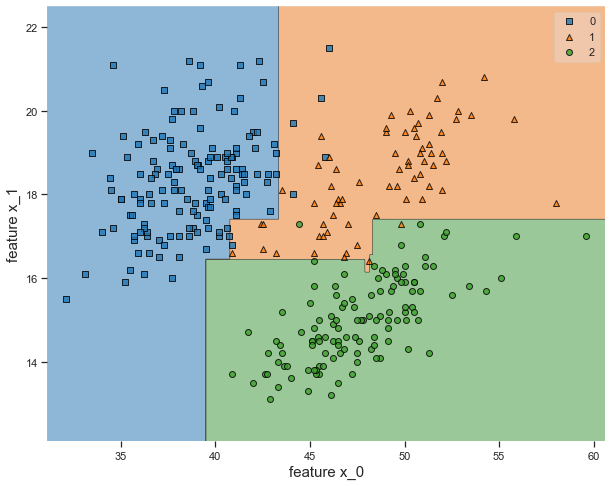

In [48]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Let us compare the plot above with the decision boundary plot of random forest

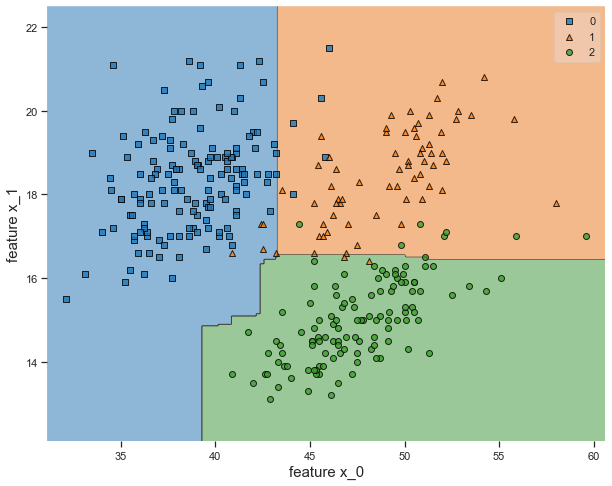

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth = 2, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

From the comparison, we can see that the decision boundary plot of Adaboost are more accurate and more pay attention to edge points

## 3. Error Analysis

Using confusion matrix and classification report to evaluate the performance of the model

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        64
           1       0.76      0.96      0.85        23
           2       0.98      0.98      0.98        47

    accuracy                           0.94       134
   macro avg       0.91      0.95      0.93       134
weighted avg       0.95      0.94      0.94       134
 



<AxesSubplot:>

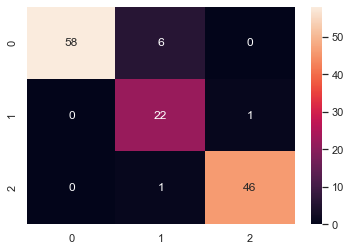

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")
confusion_m = confusion_matrix(y_test, ada_y_pred)

# convert the confusion matrix into dataframe

matrix_df = pd.DataFrame(confusion_m)
sns.heatmap(matrix_df,annot=True)



From the classification report and confusion matrix, the precision and recall is high except for the category II. It may be due to the smaller number of samples.

# Gradient Boosting

Another popular boosting method is gradient boosting. This method works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the residual errors made by the previous predictor.

we still use the penguin dataset

## 1. Train the model

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(max_depth = 2, n_estimators = 500, learning_rate=0.8, random_state=42)
grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=42)

using gradient boosting classifier to make the prediction

In [44]:
gb_y_pred = grad_boost_clf.predict(X_test)

let us give a look at decision boundary plot.


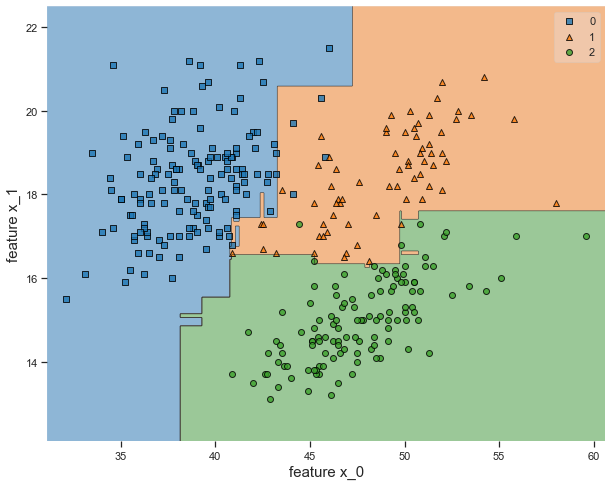

In [36]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = grad_boost_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

The plot is similar as the Adaboost plot. we can try different learning rate and n_estimators

In [42]:
grad_boost_clf2 = GradientBoostingClassifier(max_depth = 2, n_estimators = 50, learning_rate=0.5, random_state=42)
grad_boost_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=50,
                           random_state=42)

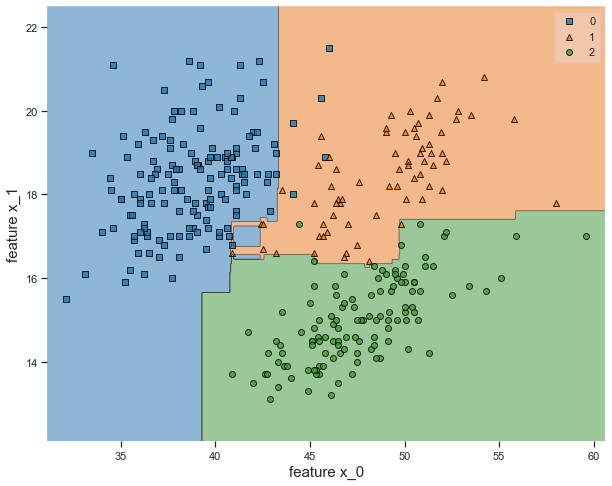

In [43]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = grad_boost_clf2)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

We can see that when we apply the different learning rate and n_estimators, the decision boundary plot would change a little.

## 2. Error Analysis

GBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.79      0.96      0.86        23
           2       0.98      0.98      0.98        47

    accuracy                           0.95       134
   macro avg       0.92      0.95      0.93       134
weighted avg       0.96      0.95      0.95       134
 



<AxesSubplot:>

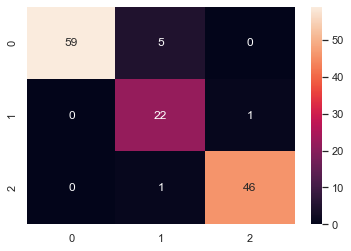

In [51]:
print(f"GBoost Classification Report")
print(classification_report(y_test, gb_y_pred), "\n")
confusion_m = confusion_matrix(y_test, gb_y_pred)

# convert the confusion matrix into dataframe

matrix_df = pd.DataFrame(confusion_m)
sns.heatmap(matrix_df,annot=True)


The precision and recall scores of GradientBoost are almost same with that of adaboost model. we can compare them to the classification report of random forest.

RandomForest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.71      0.87      0.78        23
           2       0.98      0.94      0.96        47

    accuracy                           0.92       134
   macro avg       0.89      0.91      0.89       134
weighted avg       0.93      0.92      0.92       134
 



<AxesSubplot:>

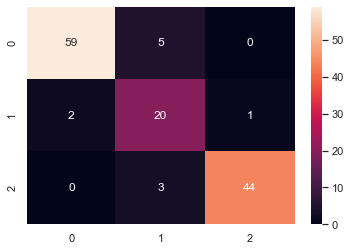

In [52]:
forest_y_pred = forest_clf.predict(X_test)

print(f"RandomForest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")
confusion_m = confusion_matrix(y_test, forest_y_pred)

# convert the confusion matrix into dataframe

matrix_df = pd.DataFrame(confusion_m)
sns.heatmap(matrix_df,annot=True)


We can see that the evaluation score of random forest model is little lower that of boosting models.